In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df = pd.read_csv('Leads.csv')
pd.set_option('display.max_columns', None)
df.shape

(9240, 37)

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#Finding the proportion of null values in each column

round(df.isnull().sum()/len(df)*100)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [6]:
#Dropping columns with relatively high proportion of null values(i.e.  > 40%)

df.drop('Lead Quality' , axis = 1 , inplace = True)

In [7]:
df.columns.get_loc('Asymmetrique Activity Index')

29

In [8]:
#Dropping columns 29 to 32

df.drop(df.iloc[: , [29,30,31,32]] , axis = 1 , inplace = True)

In [9]:
df.shape

(9240, 32)

In [10]:
df.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened


## Univariate analysis of categorical variables

In [11]:
#Lead origin column

df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

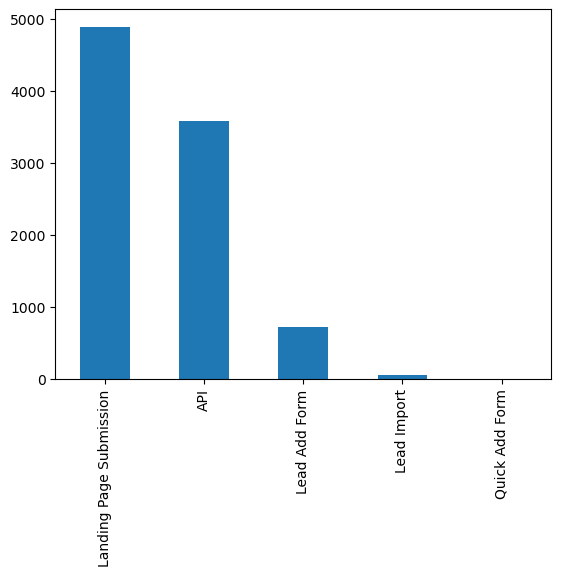

In [12]:
df['Lead Origin'].value_counts().plot.bar()

plt.show()

In [13]:
#Lead Source column

df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

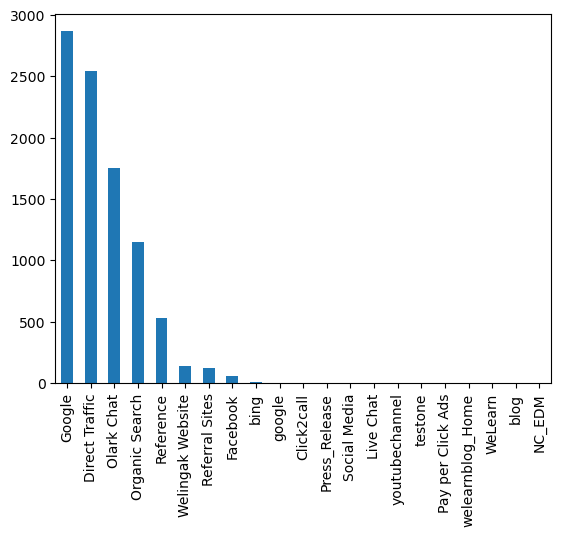

In [14]:
df['Lead Source'].value_counts().plot.bar()

plt.show()

In [15]:
#Do Not Email column

df['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

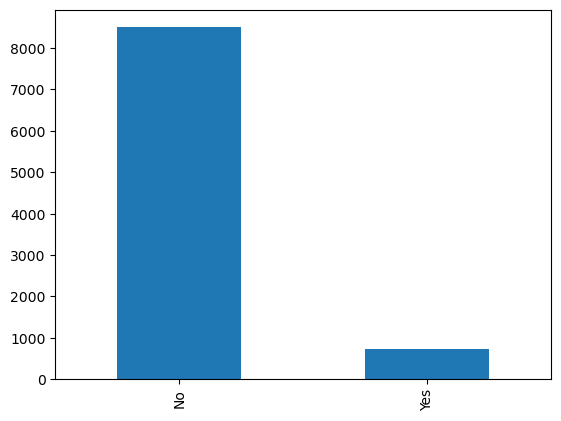

In [16]:
df['Do Not Email'].value_counts().plot.bar()

plt.show()

In [17]:
#Do not call column
df['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

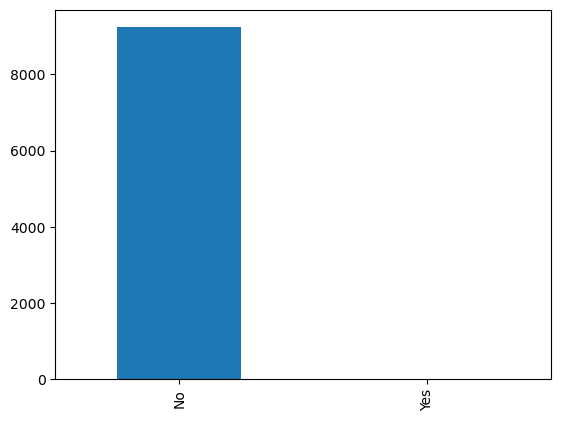

In [18]:
df['Do Not Call'].value_counts().plot.bar()

plt.show()

In [19]:
df.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened


In [20]:
#Last Activity column

df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

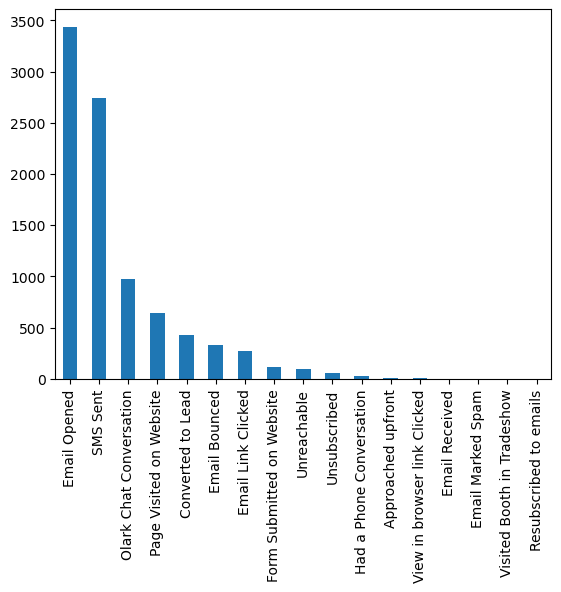

In [21]:
df['Last Activity'].value_counts().plot.bar()

plt.show()

In [22]:
#Country column
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [23]:
round(df['Country'].isnull().sum()/len(df)*100)

27

Since an overwhelming proportion of the customers are from India and since the column has a relatively high proportion of null                                         values, the column can be dropped.

In [24]:
df.drop('Country' , axis = 1 , inplace = True)

In [25]:
# City column
df.City.info()

<class 'pandas.core.series.Series'>
RangeIndex: 9240 entries, 0 to 9239
Series name: City
Non-Null Count  Dtype 
--------------  ----- 
7820 non-null   object
dtypes: object(1)
memory usage: 72.3+ KB


In [26]:
df.City.value_counts()/len(df)*100

Mumbai                         34.870130
Select                         24.339827
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [27]:
round(df.City.isnull().sum()/len(df)*100)

15

This column can also be dropped since it has a high proportion of null and 'SELECT' values.

In [28]:
df.drop('City' , axis = 1 , inplace = True)

In [29]:
df.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,No,Yes,Email Opened


In [30]:
round(df.Specialization.isnull().sum()/len(df)*100)

16

In [31]:
round(df.Specialization.value_counts()/len(df)*100)

Select                               21.0
Finance Management                   11.0
Human Resource Management             9.0
Marketing Management                  9.0
Operations Management                 5.0
Business Administration               4.0
IT Projects Management                4.0
Supply Chain Management               4.0
Banking, Investment And Insurance     4.0
Travel and Tourism                    2.0
Media and Advertising                 2.0
International Business                2.0
Healthcare Management                 2.0
Hospitality Management                1.0
E-COMMERCE                            1.0
Retail Management                     1.0
Rural and Agribusiness                1.0
E-Business                            1.0
Services Excellence                   0.0
Name: Specialization, dtype: float64

In [32]:
#Dropping specialization column
df.drop('Specialization' , axis = 1 , inplace = True)

In [33]:
df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [34]:
#Dropping 'How did you hear about X Education' column
df.drop('How did you hear about X Education' , axis = 1 , inplace = True)

In [35]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

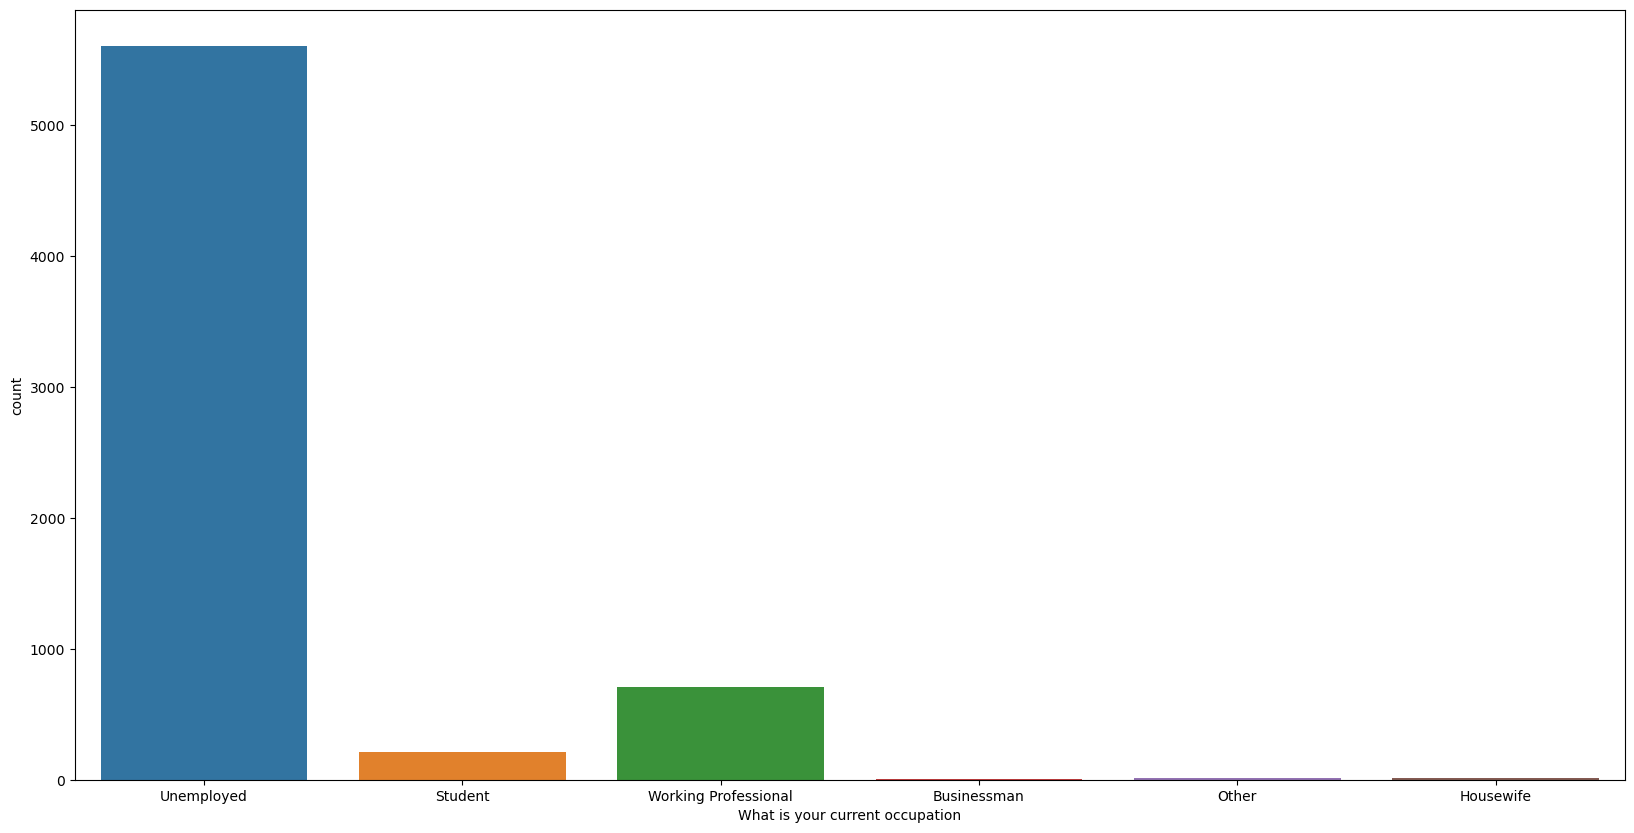

In [36]:
plt.figure(figsize = (20,10))

sns.countplot('What is your current occupation' , data = df)

plt.show()

In [37]:
df.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,No,Yes,Email Opened


In [38]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

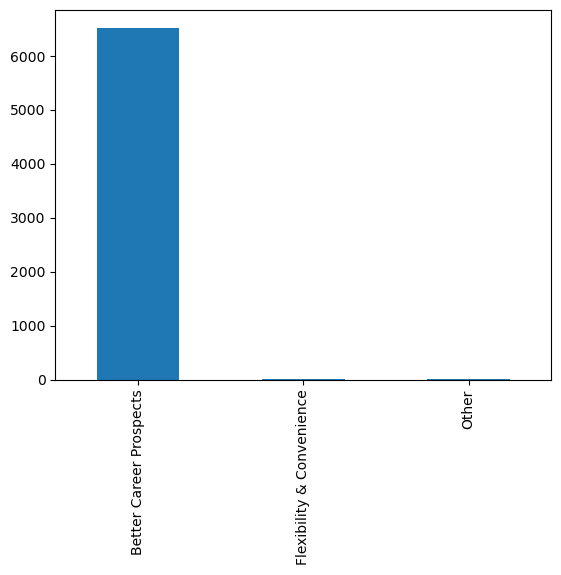

In [39]:
df['What matters most to you in choosing a course'].value_counts().plot.bar()

plt.show()

In [40]:
df.Converted.value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [41]:
df.Search.value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [42]:
df.Magazine.value_counts()

No    9240
Name: Magazine, dtype: int64

In [43]:
df['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [44]:
df['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [45]:
df['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [46]:
df['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [47]:
df['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [48]:
df.columns.get_loc('Search')

13

In [49]:
#These colums dont seem to have any impact on the target variable,hence dropping them

df.drop(df.iloc[: , [13,14,15,16,17,18,19,20]] , axis = 1 , inplace = True)

In [50]:
df.shape

(9240, 20)

In [51]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,Interested in other courses,No,No,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,Ringing,No,No,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,Will revert after reading the email,No,No,Potential Lead,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,Ringing,No,No,Select,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,Will revert after reading the email,No,No,Select,No,No,Modified


In [52]:
df.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [53]:
df['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [54]:
df.drop('Update me on Supply Chain Content' , axis = 1 , inplace = True)

In [55]:
df['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [56]:
df.drop('Get updates on DM Content' , axis = 1 , inplace = True)

In [57]:
df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [58]:
df.drop('Lead Profile' , axis = 1 , inplace = True)

In [59]:
df['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [60]:
df.drop('I agree to pay the amount through cheque' , axis = 1 , inplace = True)

In [61]:
df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

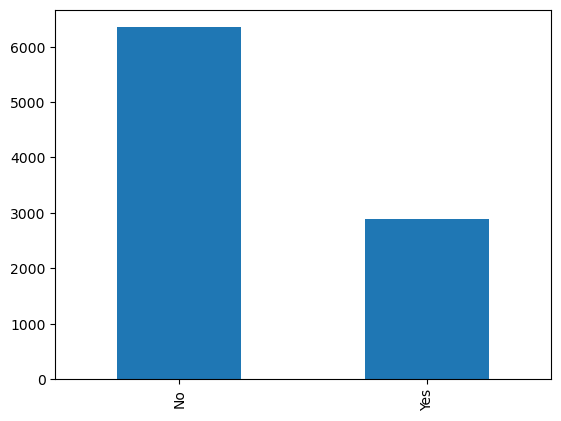

In [62]:
df['A free copy of Mastering The Interview'].value_counts().plot.bar()

plt.show()

In [63]:
df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [64]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,Interested in other courses,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,Ringing,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,Will revert after reading the email,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,Ringing,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,Will revert after reading the email,No,Modified


In [65]:
df.shape

(9240, 16)

In [66]:
df.isnull().sum()/len(df)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
A free copy of Mastering The Interview            0.000000
Last Notable Activity                             0.000000
dtype: float64

In [67]:
df.drop('Tags' , axis = 1 , inplace = True)

## Univariate analysis of numerical variables

In [68]:
# TotalVisits
print("TotalVisits - Value Counts")
print("----------------------------------------")
df.TotalVisits.value_counts().head(10)

TotalVisits - Value Counts
----------------------------------------


0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

In [69]:
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = df[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

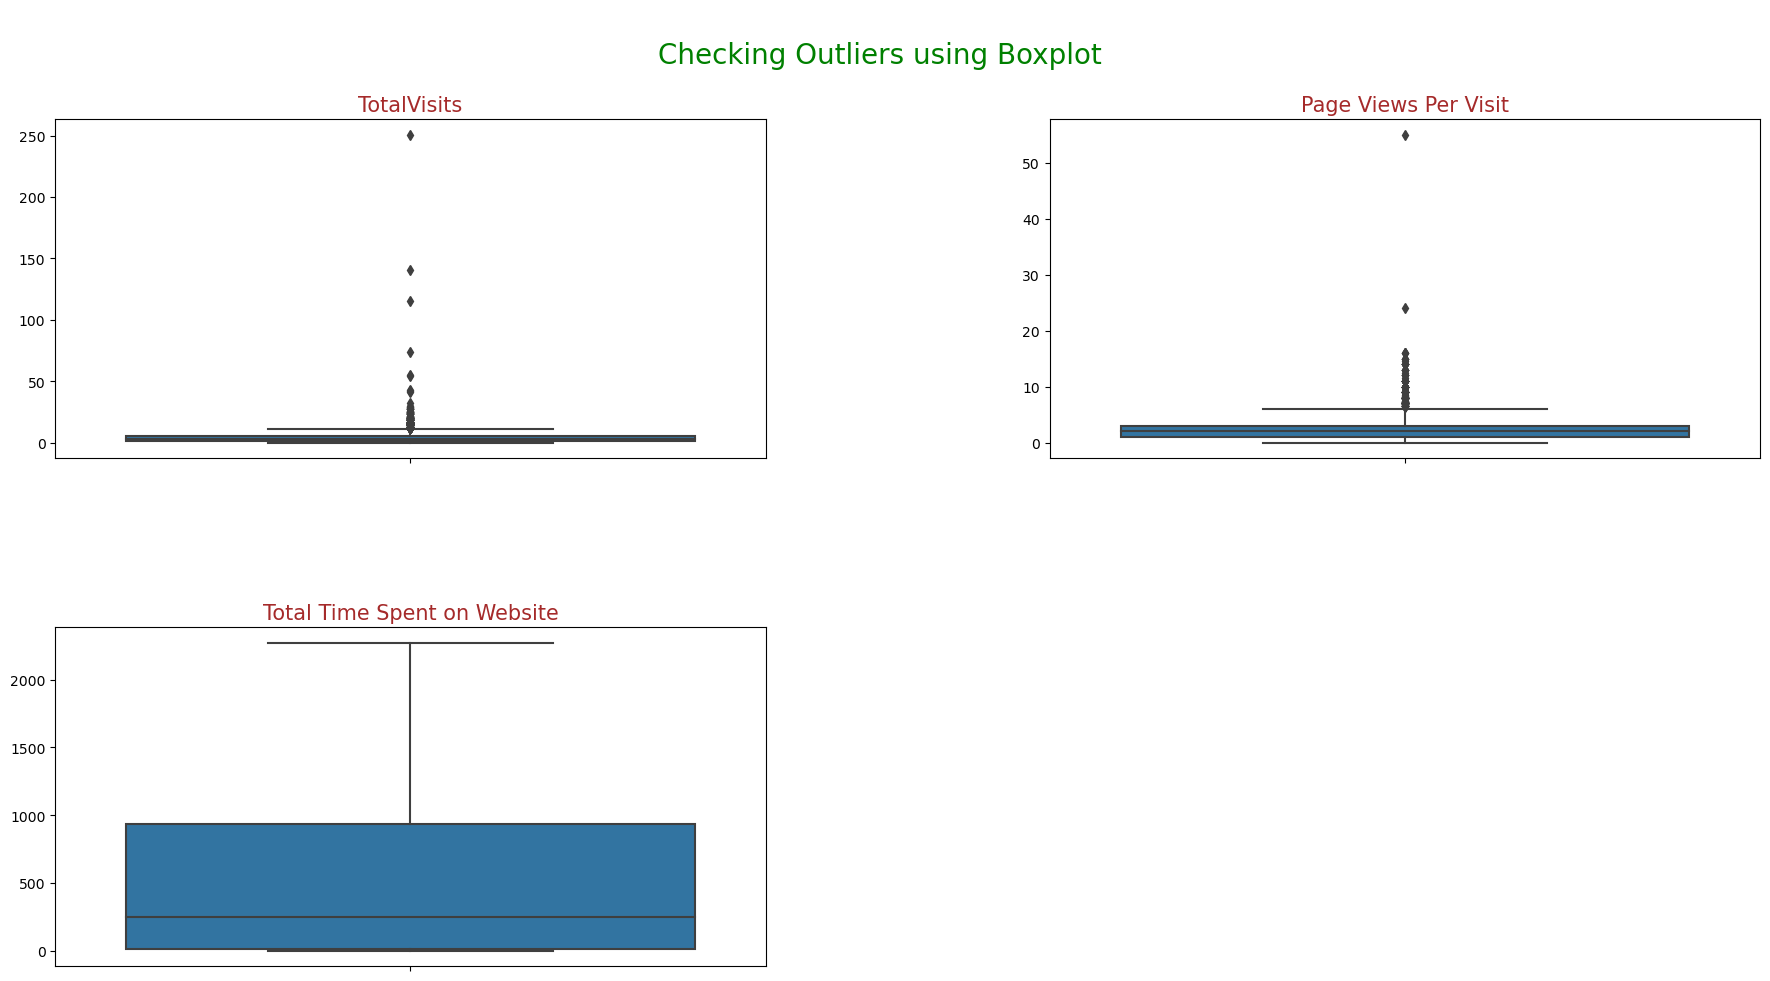

In [70]:
# Checking outliers for numerical variables other than target variable 
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF 
Check_Outliers(df,num_cols)

In [71]:
# Defining UDF to treat outliers via capping and flooring

def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])
        

In [72]:
# Checking outliers for numerical variables other than target variable 
capping_cols = ["TotalVisits","Page Views Per Visit"]

# UDF 
Outlier_treatment(df,capping_cols)

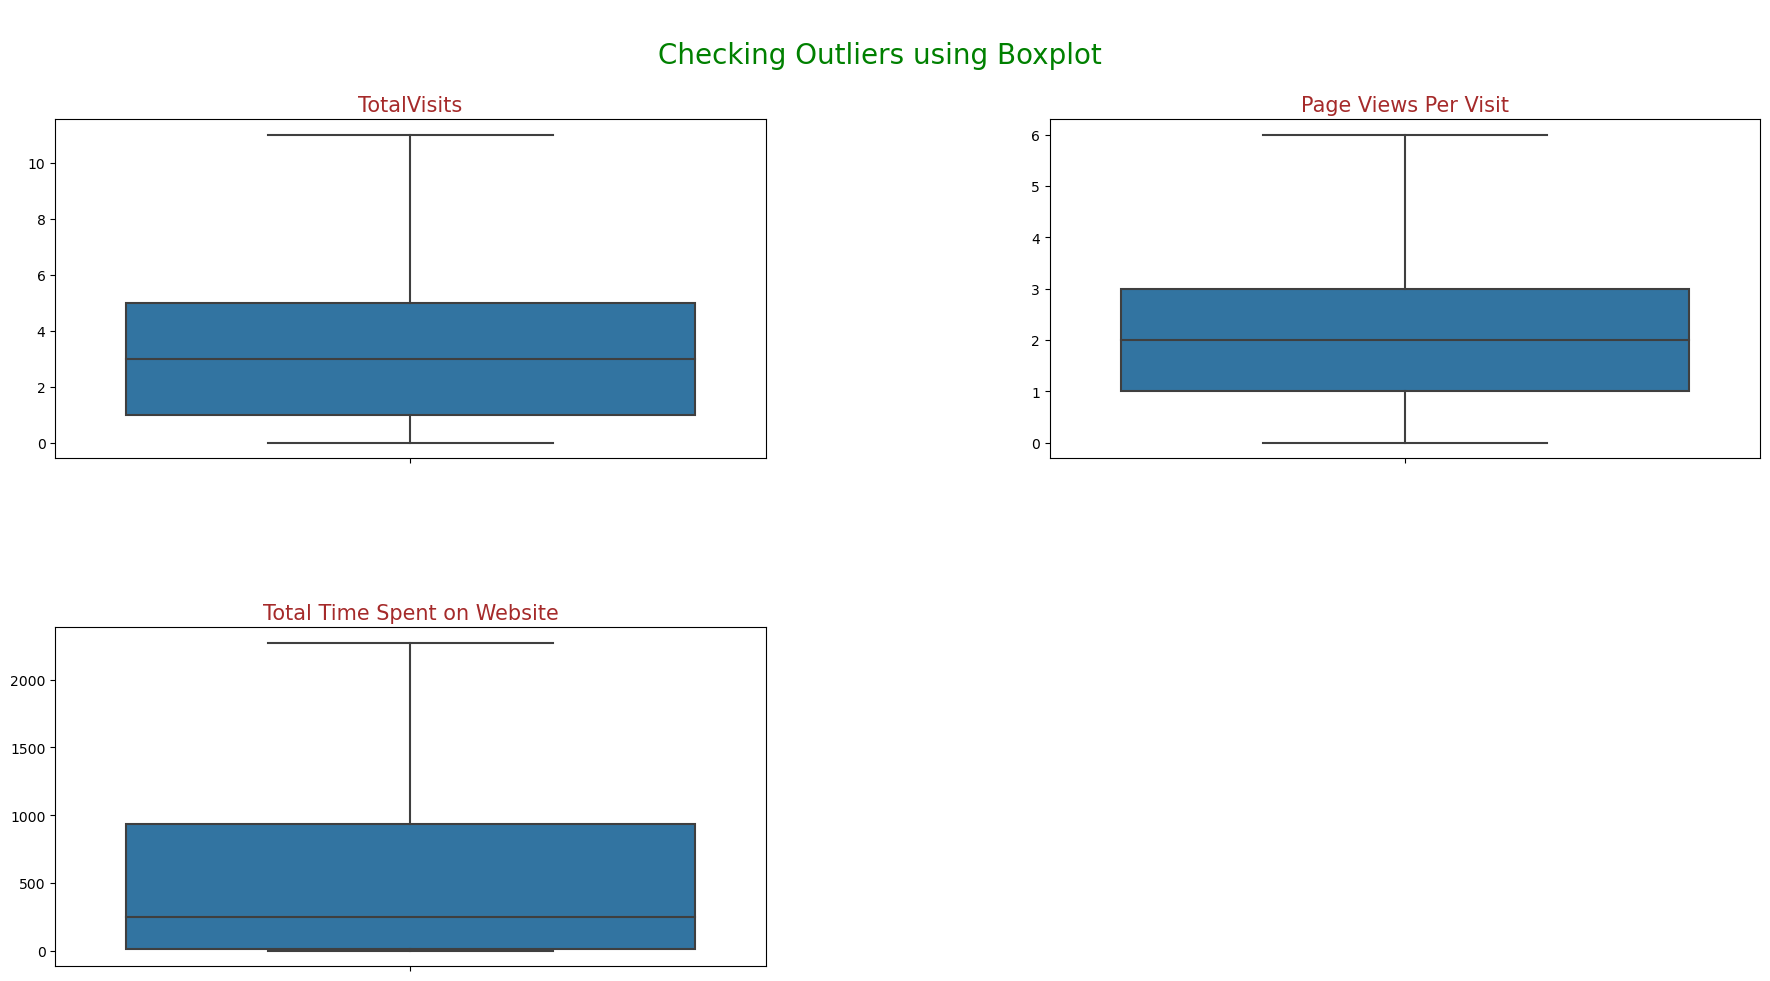

In [73]:
# Checking Boxplot after Outlier Treatment

num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF for boxplot
Check_Outliers(df,num_cols)

In [74]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,No,Modified


In [75]:
df.TotalVisits.info()

<class 'pandas.core.series.Series'>
RangeIndex: 9240 entries, 0 to 9239
Series name: TotalVisits
Non-Null Count  Dtype  
--------------  -----  
9103 non-null   float64
dtypes: float64(1)
memory usage: 72.3 KB


In [76]:
df['TotalVisits'].describe()

count    9103.000000
mean        3.220696
std         2.881792
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        11.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

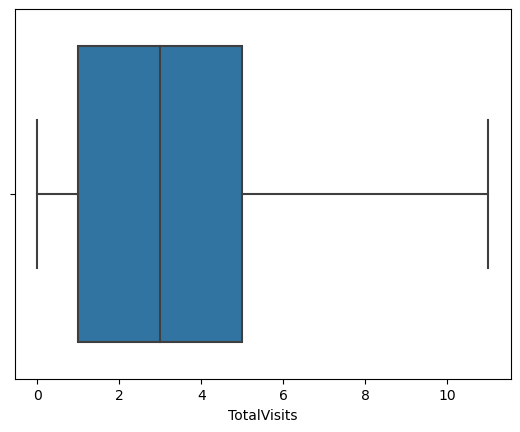

In [77]:
#checking for outliers
sns.boxplot('TotalVisits' , data = df)

In [78]:
#Calculating the inter quartile range and the upper bound

IQR = df['TotalVisits'].quantile(0.75) - df['TotalVisits'].quantile(0.25)

UPPER_THRESHOLD = df['TotalVisits'].quantile(0.75) + 1.5*IQR

UPPER_THRESHOLD

11.0

In [79]:
df['TotalVisits'].quantile(0.96)

10.0

In [80]:
# Replacing all the values above the upper bound by the upper bound value.

df['TotalVisits'] = df['TotalVisits'].apply(lambda x : x if x <= 10 else 10)

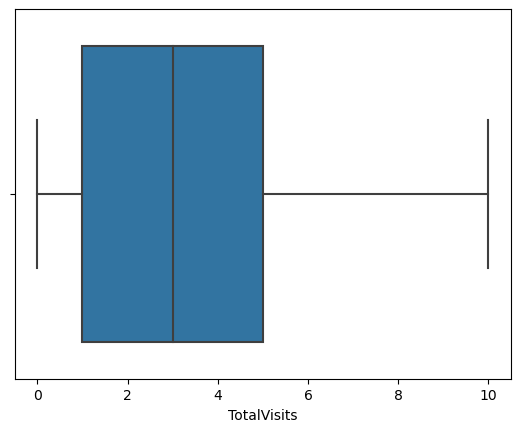

In [81]:
#Checking for outliers again

sns.boxplot('TotalVisits' , data = df)
plt.show()

In [82]:
df['Total Time Spent on Website'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9240 entries, 0 to 9239
Series name: Total Time Spent on Website
Non-Null Count  Dtype
--------------  -----
9240 non-null   int64
dtypes: int64(1)
memory usage: 72.3 KB


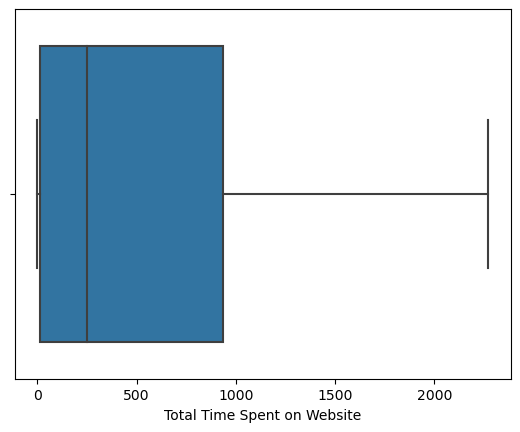

In [83]:
sns.boxplot('Total Time Spent on Website' , data = df)

plt.show()

In [84]:
df['Total Time Spent on Website'].max()

2272

In [85]:
df['Page Views Per Visit'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9240 entries, 0 to 9239
Series name: Page Views Per Visit
Non-Null Count  Dtype  
--------------  -----  
9103 non-null   float64
dtypes: float64(1)
memory usage: 72.3 KB


In [86]:
df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.258944
std         1.792536
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: Page Views Per Visit, dtype: float64

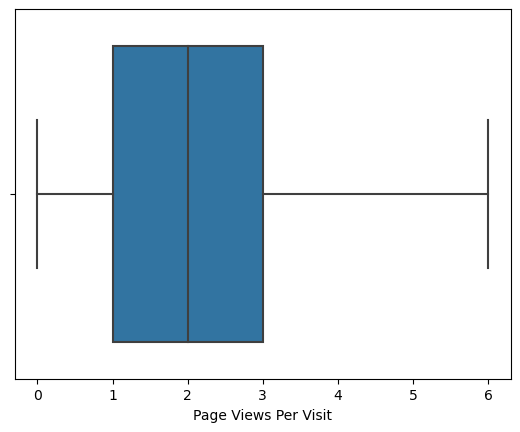

In [87]:
sns.boxplot('Page Views Per Visit' , data = df)
plt.show()

In [88]:
# Calculating the interquartile range and the upper bound

IQR = df['Page Views Per Visit'].quantile(0.75) - df['Page Views Per Visit'].quantile(0.25)

UPPER_THRESHOLD = df['Page Views Per Visit'].quantile(0.75) + 1.5 * IQR

UPPER_THRESHOLD

6.0

In [89]:
df['Page Views Per Visit'].quantile(0.97)

6.0

In [90]:
#Replacing values above the upper bound by the upper bound value.

df['Page Views Per Visit'] = df['Page Views Per Visit'].apply(lambda x : x if x <= 7 else 7 )

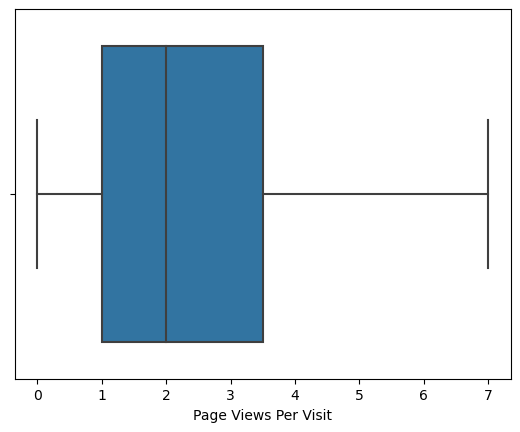

In [91]:
#Checking for outliers again.

sns.boxplot('Page Views Per Visit' , data = df)
plt.show()

In [92]:
df.drop(['Prospect ID' , 'Lead Number'] , axis = 1 , inplace = True)

In [93]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,No,Modified


In [94]:
df.shape

(9240, 13)

In [95]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [96]:
df.drop('What matters most to you in choosing a course' , axis = 1 , inplace = True)

In [97]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [98]:
df.isnull().sum()/len(df)*100

Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Do Not Call                                0.000000
Converted                                  0.000000
TotalVisits                                0.000000
Total Time Spent on Website                0.000000
Page Views Per Visit                       0.000000
Last Activity                              1.114719
What is your current occupation           29.112554
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [99]:
df=df[~pd.isnull(df['What is your current occupation'])]
df=df[~pd.isnull(df['Lead Source'])]
df=df[~pd.isnull(df['TotalVisits'])]
df=df[~pd.isnull(df['Page Views Per Visit'])]
df=df[~pd.isnull(df['Last Activity'])]

In [100]:
df.isnull().sum()/len(df)*100

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [101]:
df.head(3)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened


In [102]:
df.shape

(6413, 12)

### Bivariate analysis of categorical variables against the target variable

In [103]:
#Lead origin vs converted

df.groupby('Lead Origin')['Converted'].mean()*100

Lead Origin
API                        44.558617
Landing Page Submission    42.766950
Lead Add Form              93.333333
Lead Import                34.482759
Name: Converted, dtype: float64

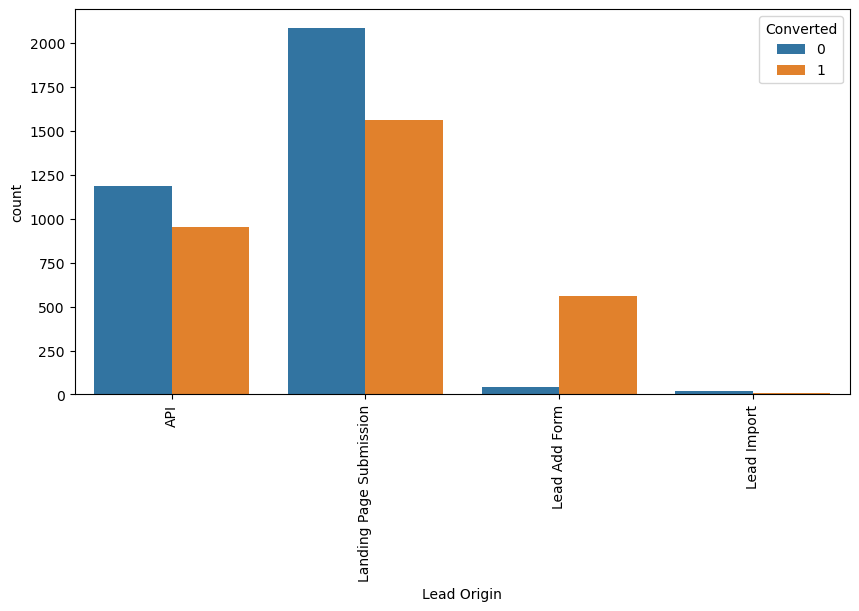

In [104]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

In [105]:
#Lead source vs converted

df.groupby('Lead Source')['Converted'].mean()*100

Lead Source
Click2call            75.000000
Direct Traffic        37.387626
Facebook              33.333333
Google                49.560547
Live Chat            100.000000
Olark Chat            42.553191
Organic Search        43.793103
Pay per Click Ads      0.000000
Press_Release          0.000000
Reference             92.207792
Referral Sites        37.333333
Social Media          50.000000
WeLearn              100.000000
Welingak Website      98.449612
bing                  33.333333
testone                0.000000
Name: Converted, dtype: float64

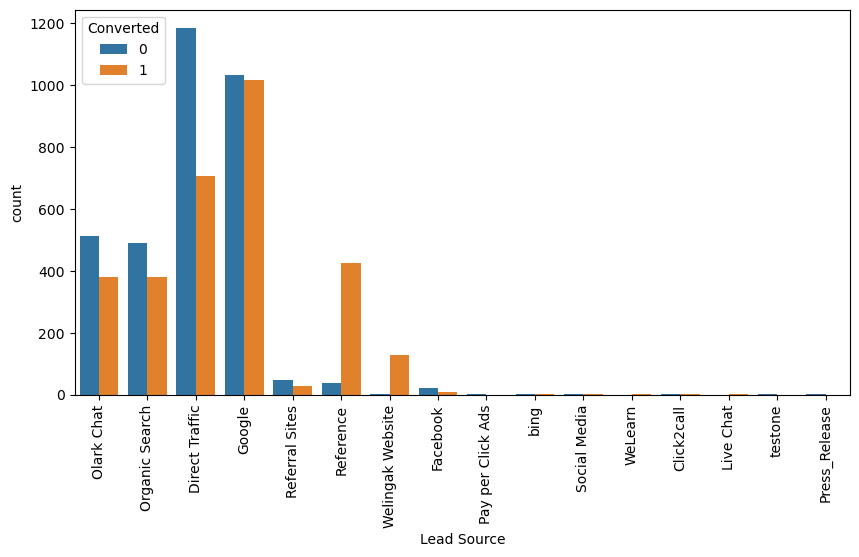

In [106]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

In [107]:
df.head(3)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened


In [108]:
#Do not email vs converted

df.groupby('Do Not Email')['Converted'].mean()*100

Do Not Email
No     50.117410
Yes    20.842572
Name: Converted, dtype: float64

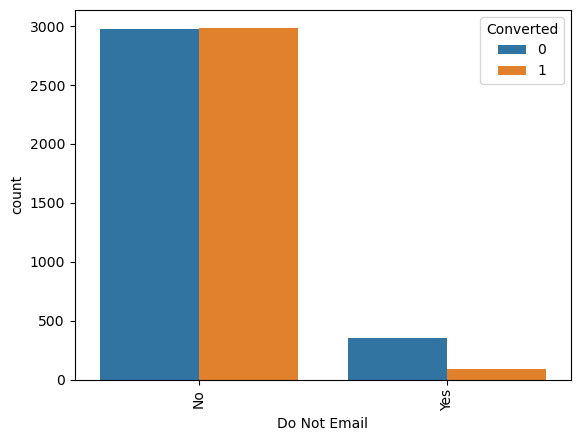

In [109]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

In [110]:
#Do not call vs converted

df.groupby('Do Not Call')['Converted'].mean()*100

Do Not Call
No      48.042427
Yes    100.000000
Name: Converted, dtype: float64

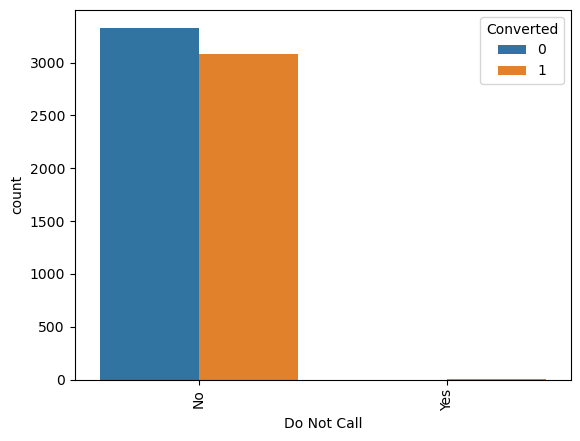

In [111]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

In [112]:
df.head(3)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened


In [113]:
# Last activity vs converted

df.groupby('Last Activity')['Converted'].mean()*100

Last Activity
Approached upfront              100.000000
Converted to Lead                16.216216
Email Bounced                    11.458333
Email Link Clicked               38.202247
Email Marked Spam               100.000000
Email Opened                     46.680244
Email Received                  100.000000
Form Submitted on Website        31.707317
Had a Phone Conversation         75.000000
Olark Chat Conversation          17.523364
Page Visited on Website          31.701632
SMS Sent                         67.822912
Unreachable                      39.189189
Unsubscribed                     26.829268
View in browser link Clicked     20.000000
Visited Booth in Tradeshow        0.000000
Name: Converted, dtype: float64

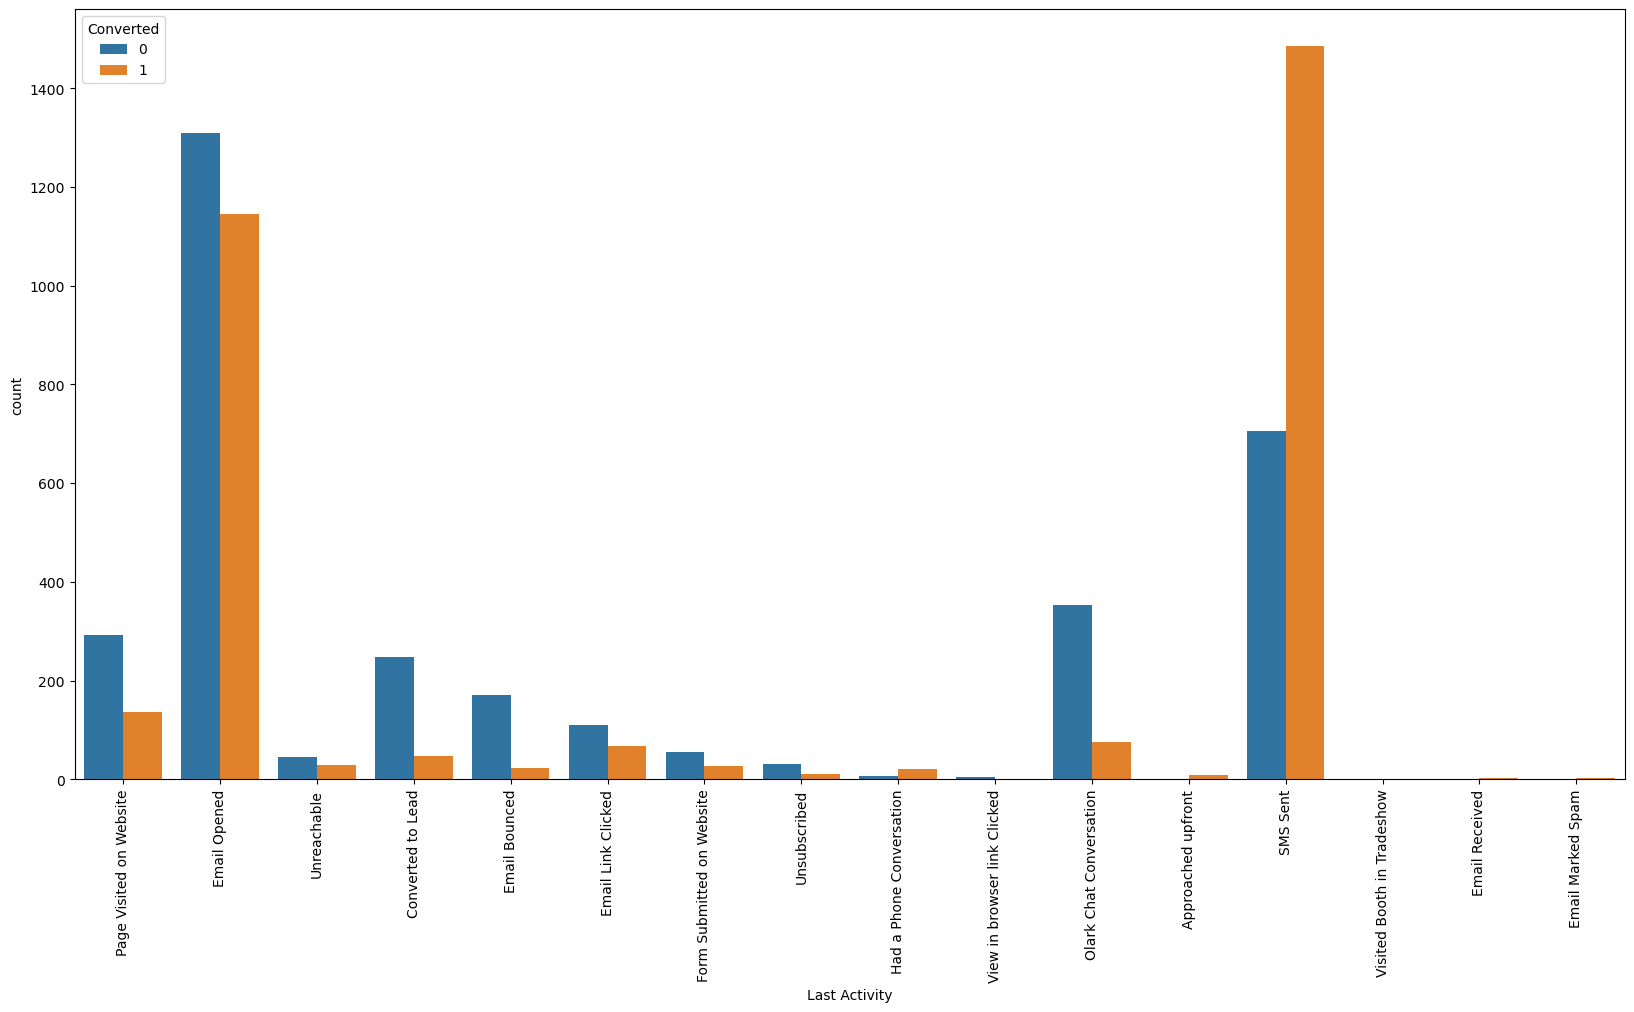

In [114]:
fig, axs = plt.subplots(figsize = (20,10))
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

In [115]:
# Current occupation vs converted

df.groupby('What is your current occupation')['Converted'].mean()*100

What is your current occupation
Businessman              62.500000
Housewife               100.000000
Other                    60.000000
Student                  35.922330
Unemployed               42.953387
Working Professional     91.654466
Name: Converted, dtype: float64

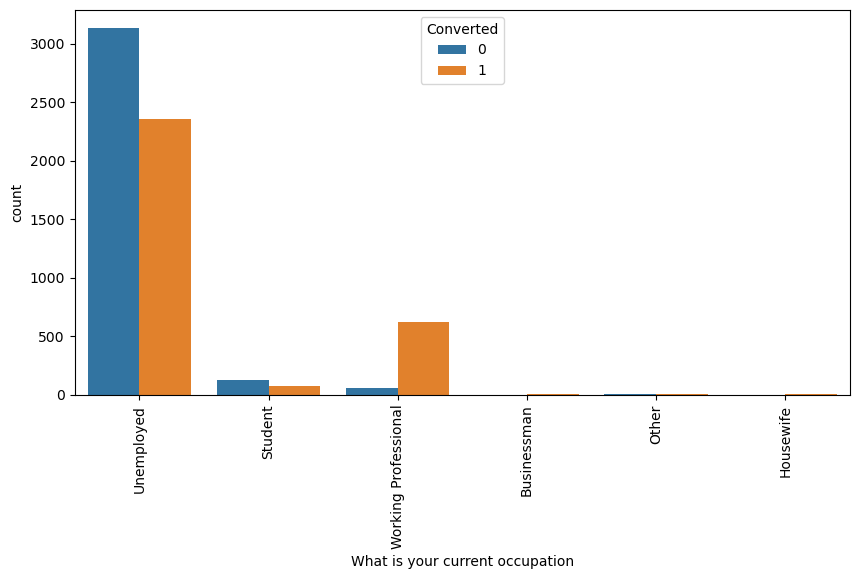

In [116]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

### Bivariate analysis of numerical variables against the target variable

In [117]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

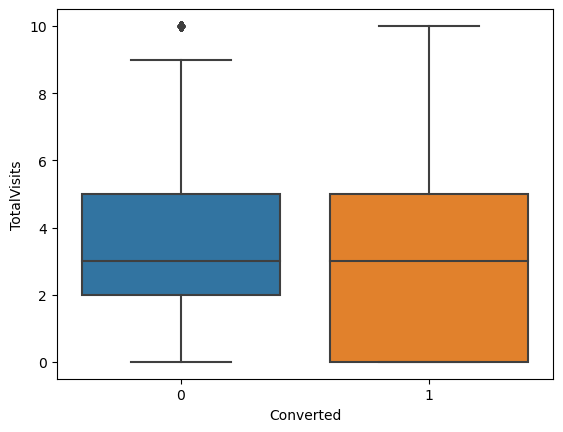

In [118]:
# Totalvisits vs converted
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

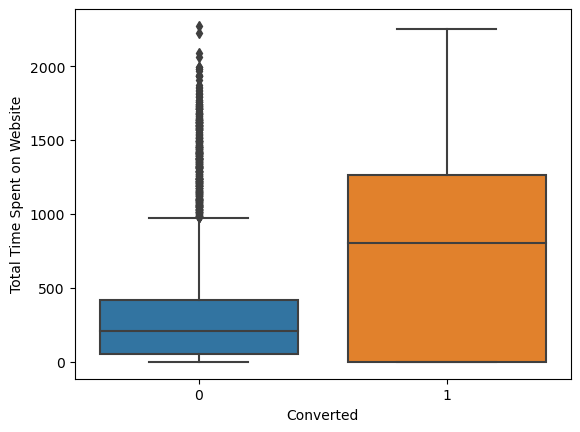

In [119]:
#Total Time Spent on Website vs converted
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

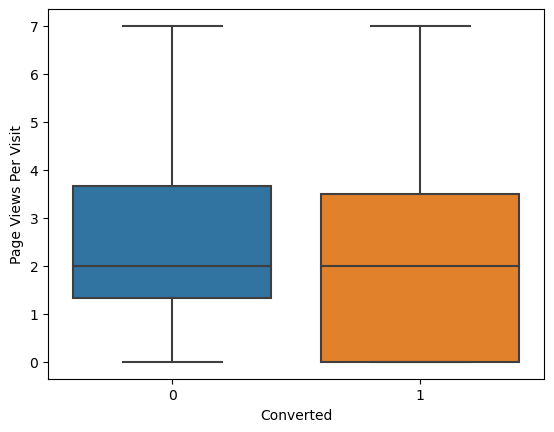

In [120]:
#Page Views Per Visit vs converted
sns.boxplot(y = 'Page Views Per Visit' , x = 'Converted' , data = df)

<Figure size 1600x400 with 0 Axes>

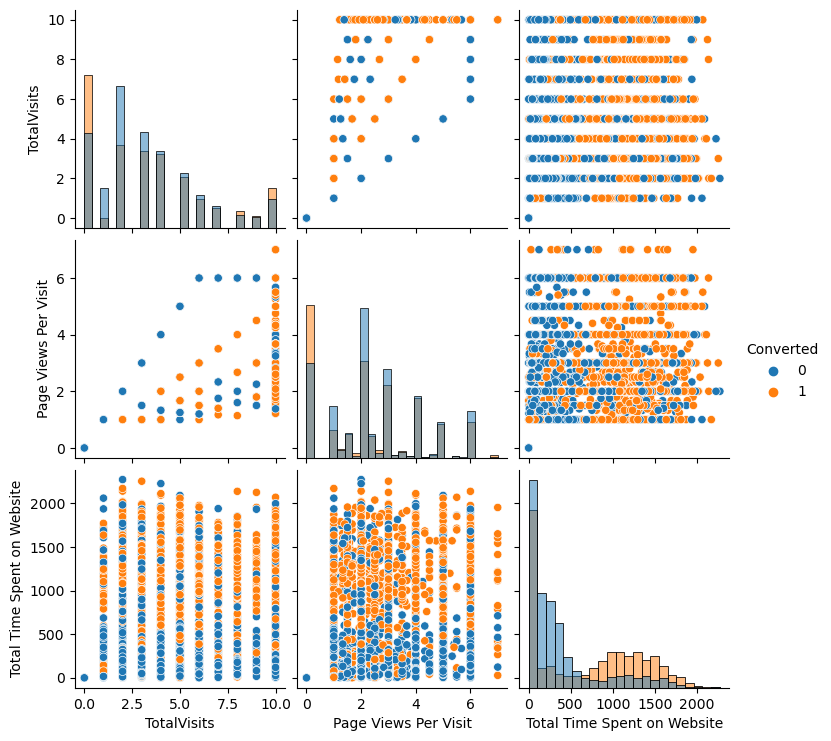

In [121]:
plt.figure(figsize=(16, 4))

sns.pairplot(data=df, vars=num_cols, hue="Converted", diag_kind="hist")
plt.show()


In [122]:
num_cols =['Converted','TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

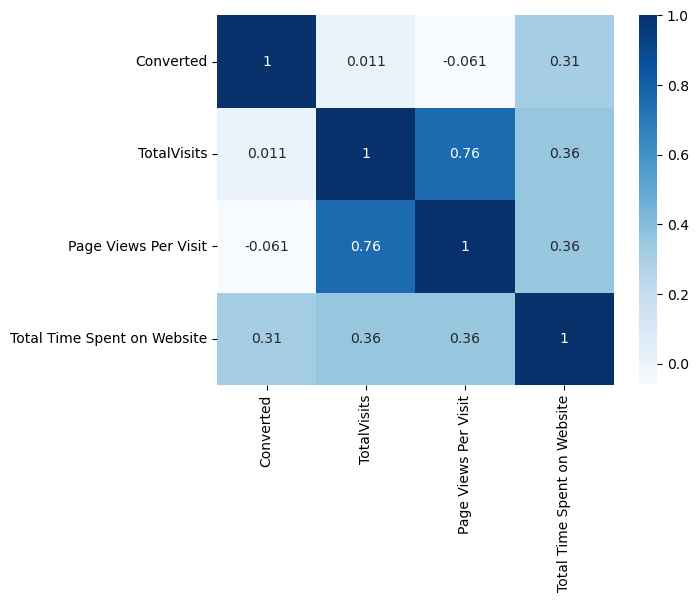

In [123]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data=df[num_cols].corr(),cmap="Blues",annot=True)
plt.show()

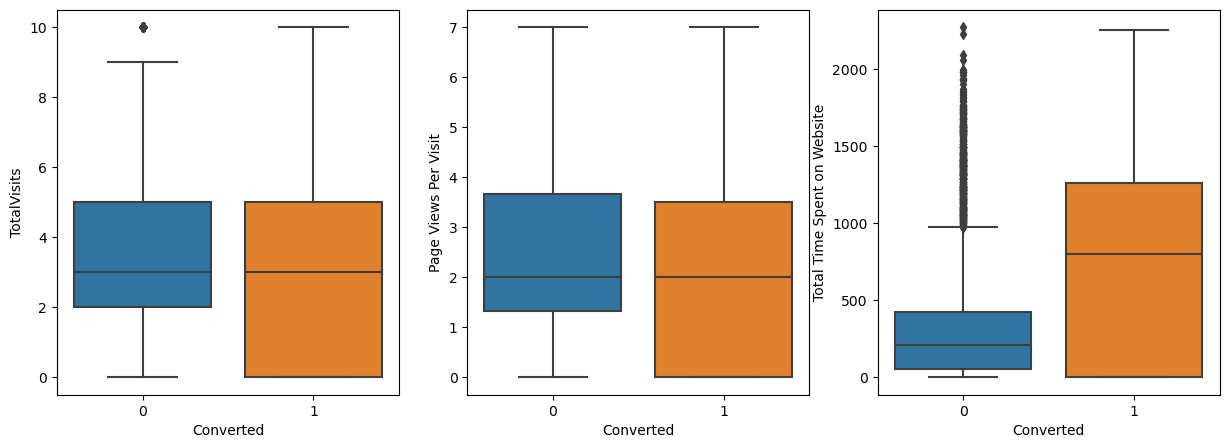

In [124]:
# Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)
plt.show()

### Data preparation

In [125]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [126]:
#Converting binary categorical variables from YES/NO to 1/0
#There are two binary categorical variables ; 'Do Not Email' and 'Do Not Call'

df['Do Not Email'].replace(['Yes' , 'No'] , [1,0] , inplace = True)

df['Do Not Call'].replace(['Yes' , 'No'] , [1,0] , inplace = True)

In [127]:
df[['Do Not Email' , 'Do Not Call']]

,Do Not Email,Do Not Call
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
9234,0,0
9235,1,0
9236,0,0
9237,1,0


In [128]:
df.head(3)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened


In [129]:
# Creating dummy variables for categorical variables with more than two levels.

dum_list = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
                              'A free copy of Mastering The Interview' , 'Last Notable Activity']], drop_first=True)

In [130]:
dum_list.head(3)

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [131]:
dum_list.shape

(6413, 52)

In [132]:
# Concatenating dum_list with the main data frame , df.

df = pd.concat([df , dum_list] , axis = 1)

In [133]:
df.head(3)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [134]:
#Dropping redundant columns

df.drop(['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
                              'A free copy of Mastering The Interview' , 'Last Notable Activity'] , axis = 1 , inplace = True)

In [135]:
df.head(3)

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [136]:
df.shape

(6413, 58)

### Splitting the data into independent(X) and dependent(y) variables

In [137]:
y = df.pop('Converted')

y.head(3)

0    0
1    0
2    1
Name: Converted, dtype: int64

In [138]:
X = df

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Creating train and test sets

In [139]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature scaling

In [140]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8943,0,0,-0.495183,1.234630,-0.221658,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
6777,0,0,-0.142009,-0.796551,0.334482,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6716,1,0,-0.142009,-0.358522,0.334482,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
7033,1,0,-1.201531,-0.950214,-1.333938,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3843,0,0,-0.495183,-0.374419,-0.221658,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


### Model building

In [141]:
#First model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())

logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4489
Model:                            GLM   Df Residuals:                     4434
Model Family:                Binomial   Df Model:                           54
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1987.3
Date:                Mon, 21 Aug 2023   Deviance:                       3974.6
Time:                        22:56:49   Pearson chi2:                 4.78e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3933
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6600   1.12e+05   5.87e-06      1.000    -2.2e+05     2.2e+05
Do Not Email                                            -1.6357      0.263     -6.218      0.000      -2.151      -1.120
Do Not Call                                             23.3027   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
TotalVisits                                              0.4592      0.066      7.009      0.000       0.331       0.588
Total Time Spent on Website                              1.1139      0.048     23.139      0.000       1.020       1.208
Page Views Per Visit                                    -0.3717      0.070     -5.319      0.000      -0.509      -0.235
Lead Origin_Landing Page Submission                     -0.1151      0.121     -0.949      0.343      -0.353       0.123
Lead Origin_Lead Add Form                               25.1416   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Origin_Lead Import                                 24.3345   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                              22.6266   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Facebook                                    -0.5446   1.12e+05  -4.85e-06      1.000    -2.2e+05     2.2e+05
Lead Source_Google                                      23.0075   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Live Chat                                 1.746e-09   1.06e-05      0.000      1.000   -2.07e-05    2.07e-05
Lead Source_Olark Chat                                  24.2091   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Organic Search                              22.7568   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Pay per Click Ads                            1.0196   1.12e+05   9.07e-06      1.000    -2.2e+05     2.2e+05
Lead Source_Press_Release                                3.3177   1.12e+05   2.95e-05      1.000    -2.2e+05     2.2e+05
Lead Source_Reference                                    1.3482      1.269      1.063      0.288      -1.138       3.835
Lead Source_Referral Sites                              22.9214   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Social Media                                24.9792   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_WeLearn                                     46.0238   1.12e+05      0.000      1.000    -2.2e+05     2.2e+05
Lead Source_Welingak Website                             3.6590      1.605      2.280      0.023       0.513       6.805
Lead Source_bing                                        23

In [142]:
# Recursive feature elimination

logreg = LogisticRegression()

rfe = RFE(logreg , n_features_to_select = 15)

rfe = rfe.fit(X_train, y_train)

In [143]:
rfe.support_

array([ True, False, False,  True, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
       False, False, False, False,  True,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False])

In [144]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 19),
 ('TotalVisits', False, 12),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 13),
 ('Lead Origin_Landing Page Submission', False, 32),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 20),
 ('Lead Source_Direct Traffic', False, 6),
 ('Lead Source_Facebook', False, 31),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Live Chat', False, 43),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 7),
 ('Lead Source_Pay per Click Ads', False, 28),
 ('Lead Source_Press_Release', False, 41),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 9),
 ('Lead Source_Social Media', False, 14),
 ('Lead Source_WeLearn', False, 26),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 35),
 ('Lead Source_testone', False, 27),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', False, 10),
 ('Las

In [145]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [146]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_testone', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'What is your current occupation_Housewife

In [147]:
#Assessing the model

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4489
Model:                            GLM   Df Residuals:                     4473
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2069.2
Date:                Mon, 21 Aug 2023   Deviance:                       4138.4
Time:                        22:56:51   Pearson chi2:                 5.22e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3708
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4538      0.580      0.782      0.434      -0.684       1.591
Do Not Email                                            -1.7255      0.209     -8.253      0.000      -2.135      -1.316
Total Time Spent on Website                              1.1255      0.047     24.164      0.000       1.034       1.217
Lead Origin_Lead Add Form                                2.8769      1.174      2.451      0.014       0.576       5.178
Lead Source_Olark Chat                                   1.5164      0.119     12.775      0.000       1.284       1.749
Lead Source_Reference                                    0.8554      1.194      0.717      0.474      -1.484       3.195
Lead Source_Welingak Website                             3.2364      1.547      2.091      0.036       0.203       6.269
Last Activity_Converted to Lead                         -1.1955      0.235     -5.086      0.000      -1.656      -0.735
Last Activity_Olark Chat Conversation                   -1.1585      0.177     -6.552      0.000      -1.505      -0.812
Last Activity_SMS Sent                                   1.0969      0.085     12.968      0.000       0.931       1.263
Last Activity_Unsubscribed                               1.3082      0.504      2.594      0.009       0.320       2.297
What is your current occupation_Student                 -1.4693      0.617     -2.383      0.017      -2.678      -0.261
What is your current occupation_Unemployed              -1.4021      0.582     -2.410      0.016      -2.542      -0.262
What is your current occupation_Working Professional     0.9965      0.606      1.644      0.100      -0.191       2.184
Last Notable Activity_Had a Phone Conversation          23.1076   1.31e+04      0.002      0.999   -2.57e+04    2.58e+04
Last Notable Activity_Unreachable                        2.2260      0.846      2.633      0.008       0.569       3.883
========================================================================================================================
"""

In [148]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8943    0.823192
6777    0.321282
6716    0.044053
7033    0.969732
3843    0.202669
3446    0.467723
1736    0.377229
7417    0.905654
8506    0.313958
6063    0.644643
dtype: float64

In [149]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.82319158, 0.32128175, 0.04405329, 0.96973186, 0.20266907,
       0.4677233 , 0.37722921, 0.90565447, 0.31395775, 0.64464321])

In [150]:
# Creating a dataframe with conversion flag and predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.823192,8943
1,0,0.321282,6777
2,0,0.044053,6716
3,1,0.969732,7033
4,0,0.202669,3843


In [151]:
# Creating a new column with 1 if Converted_prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,1,0.823192,8943,1
1,0,0.321282,6777,0
2,0,0.044053,6716,0
3,1,0.969732,7033,1
4,0,0.202669,3843,0


In [152]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1943  378]
 [ 565 1603]]


In [153]:
# Predicted     not_converted   converted
# Actual
# not_churn        1943           378
# churn            565            1603

In [154]:
#Overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7899309423034083


#### Checking for VIF'S

In [155]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,81.23
4,Lead Source_Reference,63.62
5,Lead Source_Welingak Website,18.65
11,What is your current occupation_Unemployed,2.02
8,Last Activity_SMS Sent,1.68
3,Lead Source_Olark Chat,1.50
1,Total Time Spent on Website,1.27
12,What is your current occupation_Working Profes...,1.27
7,Last Activity_Olark Chat Conversation,1.24
0,Do Not Email,1.19


In [156]:
# Dropping features with high vif
col = col.drop('Lead Origin_Lead Add Form' , 1)

col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [157]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4489
Model:                            GLM   Df Residuals:                     4474
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.0
Date:                Mon, 21 Aug 2023   Deviance:                       4145.9
Time:                        22:56:51   Pearson chi2:                 5.21e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3697
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4568      0.580      0.787      0.431      -0.681       1.594
Do Not Email                                            -1.7279      0.209     -8.274      0.000      -2.137      -1.319
Total Time Spent on Website                              1.1217      0.046     24.127      0.000       1.031       1.213
Lead Source_Olark Chat                                   1.5069      0.119     12.714      0.000       1.275       1.739
Lead Source_Reference                                    3.7225      0.237     15.721      0.000       3.258       4.187
Lead Source_Welingak Website                             6.1045      1.013      6.029      0.000       4.120       8.089
Last Activity_Converted to Lead                         -1.2026      0.235     -5.121      0.000      -1.663      -0.742
Last Activity_Olark Chat Conversation                   -1.1626      0.177     -6.579      0.000      -1.509      -0.816
Last Activity_SMS Sent                                   1.0892      0.084     12.897      0.000       0.924       1.255
Last Activity_Unsubscribed                               1.3029      0.504      2.586      0.010       0.315       2.290
What is your current occupation_Student                 -1.4671      0.616     -2.380      0.017      -2.675      -0.259
What is your current occupation_Unemployed              -1.3955      0.582     -2.399      0.016      -2.536      -0.255
What is your current occupation_Working Professional     0.9977      0.606      1.647      0.100      -0.190       2.185
Last Notable Activity_Had a Phone Conversation          23.0974   1.31e+04      0.002      0.999   -2.57e+04    2.58e+04
Last Notable Activity_Unreachable                        2.2158      0.845      2.622      0.009       0.559       3.872
========================================================================================================================
"""

In [158]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [159]:
y_train_pred[:10]

array([0.82278158, 0.32234516, 0.04441579, 0.96956462, 0.20445042,
       0.46942075, 0.37810008, 0.90520515, 0.31503269, 0.64372466])

In [160]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [161]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,Converted_Prob
0,1,0.823192,8943,1,0.822782
1,0,0.321282,6777,0,0.322345
2,0,0.044053,6716,0,0.044416
3,1,0.969732,7033,1,0.969565
4,0,0.202669,3843,0,0.204450


In [162]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7899309423034083


In [163]:
# Checking for vif's again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.02
7,Last Activity_SMS Sent,1.68
2,Lead Source_Olark Chat,1.50
1,Total Time Spent on Website,1.27
11,What is your current occupation_Working Profes...,1.27
3,Lead Source_Reference,1.26
6,Last Activity_Olark Chat Conversation,1.24
0,Do Not Email,1.19
5,Last Activity_Converted to Lead,1.10
8,Last Activity_Unsubscribed,1.10


In [164]:
# Dropping the feature with high p value
col1 = col.drop('Last Notable Activity_Had a Phone Conversation' , 1)

col1

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [165]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4489
Model:                            GLM   Df Residuals:                     4475
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2081.8
Date:                Mon, 21 Aug 2023   Deviance:                       4163.7
Time:                        22:56:51   Pearson chi2:                 5.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3672
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4611      0.580      0.795      0.427      -0.676       1.598
Do Not Email                                            -1.7328      0.209     -8.310      0.000      -2.141      -1.324
Total Time Spent on Website                              1.1178      0.046     24.116      0.000       1.027       1.209
Lead Source_Olark Chat                                   1.4940      0.118     12.636      0.000       1.262       1.726
Lead Source_Reference                                    3.7087      0.237     15.670      0.000       3.245       4.173
Lead Source_Welingak Website                             6.0927      1.013      6.017      0.000       4.108       8.077
Last Activity_Converted to Lead                         -1.2159      0.235     -5.183      0.000      -1.676      -0.756
Last Activity_Olark Chat Conversation                   -1.1705      0.177     -6.629      0.000      -1.517      -0.824
Last Activity_SMS Sent                                   1.0761      0.084     12.770      0.000       0.911       1.241
Last Activity_Unsubscribed                               1.2944      0.503      2.572      0.010       0.308       2.281
What is your current occupation_Student                 -1.4633      0.616     -2.375      0.018      -2.671      -0.256
What is your current occupation_Unemployed              -1.3842      0.582     -2.380      0.017      -2.524      -0.244
What is your current occupation_Working Professional     1.0047      0.606      1.659      0.097      -0.182       2.192
Last Notable Activity_Unreachable                        2.1996      0.845      2.604      0.009       0.544       3.856
========================================================================================================================
"""

In [166]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [167]:
y_train_pred[:10]

array([0.82245456, 0.32359611, 0.04493462, 0.96925736, 0.20725686,
       0.4726217 , 0.37963047, 0.9047958 , 0.31629396, 0.64221007])

In [168]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [169]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,Converted_Prob
0,1,0.823192,8943,1,0.822455
1,0,0.321282,6777,0,0.323596
2,0,0.044053,6716,0,0.044935
3,1,0.969732,7033,1,0.969257
4,0,0.202669,3843,0,0.207257


In [170]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.787703274671419


In [171]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.01
7,Last Activity_SMS Sent,1.67
2,Lead Source_Olark Chat,1.50
1,Total Time Spent on Website,1.27
11,What is your current occupation_Working Profes...,1.27
3,Lead Source_Reference,1.26
6,Last Activity_Olark Chat Conversation,1.24
0,Do Not Email,1.19
5,Last Activity_Converted to Lead,1.10
8,Last Activity_Unsubscribed,1.10


In [172]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1940,  381],
       [ 572, 1596]], dtype=int64)

In [173]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.787703274671419

In [174]:
# Removing 'What is your current occupation_Working Professional' variable as it has relatively high p value
col2 = col1.drop('What is your current occupation_Working Professional' , 1)

col2

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [175]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col2])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4489
Model:                            GLM   Df Residuals:                     4476
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2083.1
Date:                Mon, 21 Aug 2023   Deviance:                       4166.2
Time:                        22:56:51   Pearson chi2:                 5.18e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3669
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.3951      0.169      8.237      0.000       1.063       1.727
Do Not Email                                  -1.7276      0.208     -8.302      0.000      -2.136      -1.320
Total Time Spent on Website                    1.1172      0.046     24.116      0.000       1.026       1.208
Lead Source_Olark Chat                         1.4939      0.118     12.637      0.000       1.262       1.726
Lead Source_Reference                          3.7077      0.237     15.668      0.000       3.244       4.171
Lead Source_Welingak Website                   6.0910      1.012      6.016      0.000       4.107       8.075
Last Activity_Converted to Lead               -1.2034      0.234     -5.150      0.000      -1.661      -0.745
Last Activity_Olark Chat Conversation         -1.1779      0.177     -6.655      0.000      -1.525      -0.831
Last Activity_SMS Sent                         1.0802      0.084     12.835      0.000       0.915       1.245
Last Activity_Unsubscribed                     1.2949      0.502      2.578      0.010       0.310       2.280
What is your current occupation_Student       -2.3972      0.268     -8.949      0.000      -2.922      -1.872
What is your current occupation_Unemployed    -2.3196      0.171    -13.593      0.000      -2.654      -1.985
Last Notable Activity_Unreachable              2.1996      0.845      2.602      0.009       0.543       3.856
==============================================================================================================
"""

In [176]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [177]:
y_train_pred[:10]

array([0.82272855, 0.32427492, 0.04510211, 0.96945374, 0.20705041,
       0.47214315, 0.37939176, 0.90492413, 0.31696853, 0.6429195 ])

In [178]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [179]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,Converted_Prob
0,1,0.823192,8943,1,0.822729
1,0,0.321282,6777,0,0.324275
2,0,0.044053,6716,0,0.045102
3,1,0.969732,7033,1,0.969454
4,0,0.202669,3843,0,0.207050


In [180]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.787926041434618


In [181]:
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,1.86
7,Last Activity_SMS Sent,1.53
2,Lead Source_Olark Chat,1.46
1,Total Time Spent on Website,1.23
6,Last Activity_Olark Chat Conversation,1.23
0,Do Not Email,1.18
3,Lead Source_Reference,1.15
8,Last Activity_Unsubscribed,1.10
5,Last Activity_Converted to Lead,1.08
4,Lead Source_Welingak Website,1.07


Since p values and vif values are within optimal range there is no need to drop any more features

#### Other metrics

In [182]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [183]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7361623616236163

In [184]:
# Let us calculate specificity
TN / float(TN+FP)

0.8358466178371392

In [185]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.16415338216286082


In [186]:
# positive predictive value 
print (TP / float(TP+FP))

0.8072837632776935


In [187]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7722929936305732


### Plotting the ROC curve

In [188]:
#An ROC curve demonstrates several things:

#It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
#The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
#The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [189]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [190]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

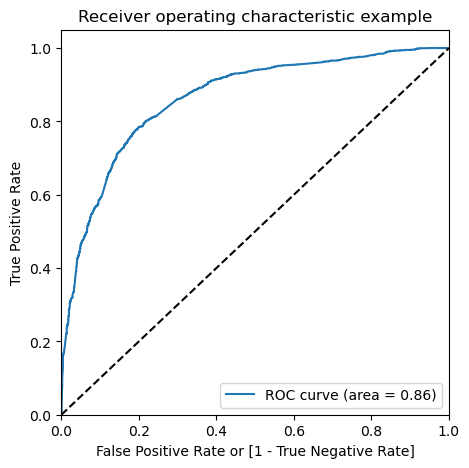

In [191]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [192]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.823192,8943,1,0.822729,1,1,1,1,1,1,1,1,1,0
1,0,0.321282,6777,0,0.324275,1,1,1,1,0,0,0,0,0,0
2,0,0.044053,6716,0,0.045102,1,0,0,0,0,0,0,0,0,0
3,1,0.969732,7033,1,0.969454,1,1,1,1,1,1,1,1,1,1
4,0,0.202669,3843,0,0.207050,1,1,1,0,0,0,0,0,0,0


In [193]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.482958  1.000000  0.000000
0.1   0.1  0.556694  0.991236  0.150797
0.2   0.2  0.709735  0.940498  0.494184
0.3   0.3  0.758521  0.904982  0.621715
0.4   0.4  0.789263  0.803506  0.775959
0.5   0.5  0.787926  0.737085  0.835416
0.6   0.6  0.774560  0.670203  0.872038
0.7   0.7  0.741813  0.552122  0.919000
0.8   0.8  0.710626  0.452030  0.952176
0.9   0.9  0.637781  0.270756  0.980612


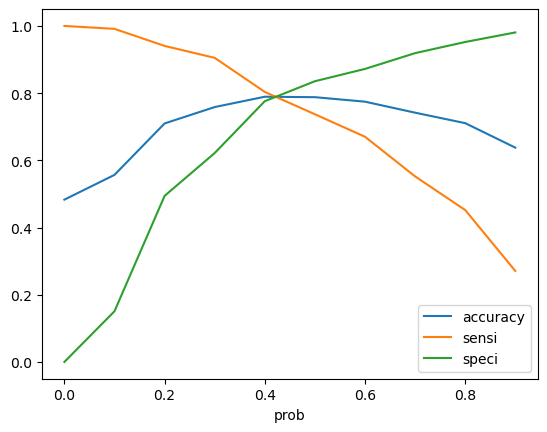

In [194]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve it is clear that the optimal cut off is 0.4

In [195]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.823192,8943,1,0.822729,1,1,1,1,1,1,1,1,1,0,1
1,0,0.321282,6777,0,0.324275,1,1,1,1,0,0,0,0,0,0,0
2,0,0.044053,6716,0,0.045102,1,0,0,0,0,0,0,0,0,0,0
3,1,0.969732,7033,1,0.969454,1,1,1,1,1,1,1,1,1,1,1
4,0,0.202669,3843,0,0.207050,1,1,1,0,0,0,0,0,0,0,0


In [196]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7892626420138116

In [197]:
#Assingning lead score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.823192,8943,1,0.822729,1,1,1,1,1,1,1,1,1,0,1,82
1,0,0.321282,6777,0,0.324275,1,1,1,1,0,0,0,0,0,0,0,32
2,0,0.044053,6716,0,0.045102,1,0,0,0,0,0,0,0,0,0,0,4
3,1,0.969732,7033,1,0.969454,1,1,1,1,1,1,1,1,1,1,1,97
4,0,0.202669,3843,0,0.207050,1,1,1,0,0,0,0,0,0,0,0,20


In [198]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1801,  520],
       [ 426, 1742]], dtype=int64)

In [199]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [200]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8035055350553506

In [201]:
# Let us calculate specificity
TN / float(TN+FP)

0.7759586385178803

In [202]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.22404136148211978


In [203]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7701149425287356


In [204]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8087112707678491


### Precision and Recall

In [205]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1939,  382],
       [ 570, 1598]], dtype=int64)

In [206]:
# Precision

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.807070707070707

In [207]:
# Recall

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7370848708487084

In [208]:
?precision_score

In [209]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.807070707070707

In [210]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7370848708487084

In [211]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       1
 4       0
        ..
 4484    0
 4485    0
 4486    0
 4487    0
 4488    0
 Name: Converted, Length: 4489, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 4484    0
 4485    1
 4486    0
 4487    0
 4488    0
 Name: predicted, Length: 4489, dtype: int64)

In [212]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

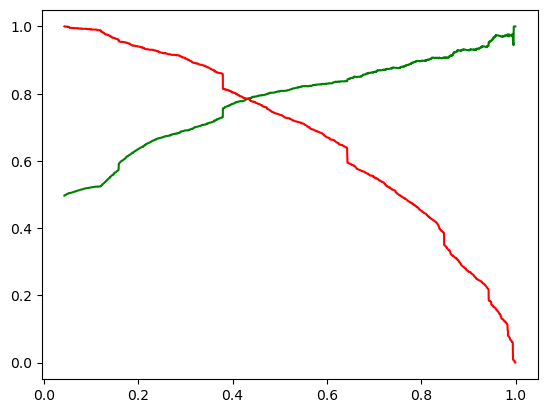

In [213]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [214]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8943,0,0,-0.495183,1.234630,-0.221658,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
6777,0,0,-0.142009,-0.796551,0.334482,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6716,1,0,-0.142009,-0.358522,0.334482,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
7033,1,0,-1.201531,-0.950214,-1.333938,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3843,0,0,-0.495183,-0.374419,-0.221658,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [215]:
X_test = X_test[col2]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable
983,0,-0.944452,0,1,0,0,0,0,0,0,1,0
3179,0,-0.250306,0,0,0,0,0,0,0,0,1,0
6683,0,-0.843259,0,0,0,0,0,0,0,0,0,0
2187,0,-0.708336,0,0,0,0,0,1,0,0,1,0
2729,0,1.320844,0,0,0,0,0,1,0,1,0,0


In [216]:
X_test_sm = sm.add_constant(X_test)

In [217]:
y_test_pred = res.predict(X_test_sm)

In [218]:
y_test_pred[:10]

983     0.849163
3179    0.230739
6683    0.611353
2187    0.346232
2729    0.825433
8205    0.943119
8920    0.874622
4159    0.055398
1559    0.996618
2132    0.982836
dtype: float64

In [219]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [220]:
# Let's see the head
y_pred_1.head()

,0
983,0.849163
3179,0.230739
6683,0.611353
2187,0.346232
2729,0.825433


In [221]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [222]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [223]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [224]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [225]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,983,0.849163
1,1,3179,0.230739
2,1,6683,0.611353
3,0,2187,0.346232
4,1,2729,0.825433


In [226]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [227]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,983,0.849163
1,1,3179,0.230739
2,1,6683,0.611353
3,0,2187,0.346232
4,1,2729,0.825433


In [228]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

In [229]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted
0,1,983,0.849163,1
1,1,3179,0.230739,0
2,1,6683,0.611353,1
3,0,2187,0.346232,0
4,1,2729,0.825433,1


In [230]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7817047817047817

In [231]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[763, 247],
       [173, 741]], dtype=int64)

In [232]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [233]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8107221006564551

In [234]:
# Let us calculate specificity
TN / float(TN+FP)

0.7554455445544555